In [1]:
import torch
import requests
from PIL import Image
from huggingface_hub import login
from transformers import Blip2Processor, Blip2Model, Blip2ForConditionalGeneration
#login(token="")

/ext3/miniconda3/envs/py38/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2024-02-09 10:23:02,876] [INFO] [real_accelerator.py:110:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
#from huggingface_hub import snapshot_download
#snapshot_download(repo_id="Salesforce/blip2-opt-2.7b", local_dir="./data/blip2/blip2-opt-2.7b", cache_dir="/home/rl3725/scratch/cache_huggingface")

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = Blip2Processor.from_pretrained("./data/blip2/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("./data/blip2/blip2-opt-2.7b", load_in_8bit=True, device_map={"": 0}, torch_dtype=torch.float16)  # doctest: +IGNORE_RESULT

Loading checkpoint shards: 100%|██████████| 2/2 [00:42<00:00, 21.05s/it]


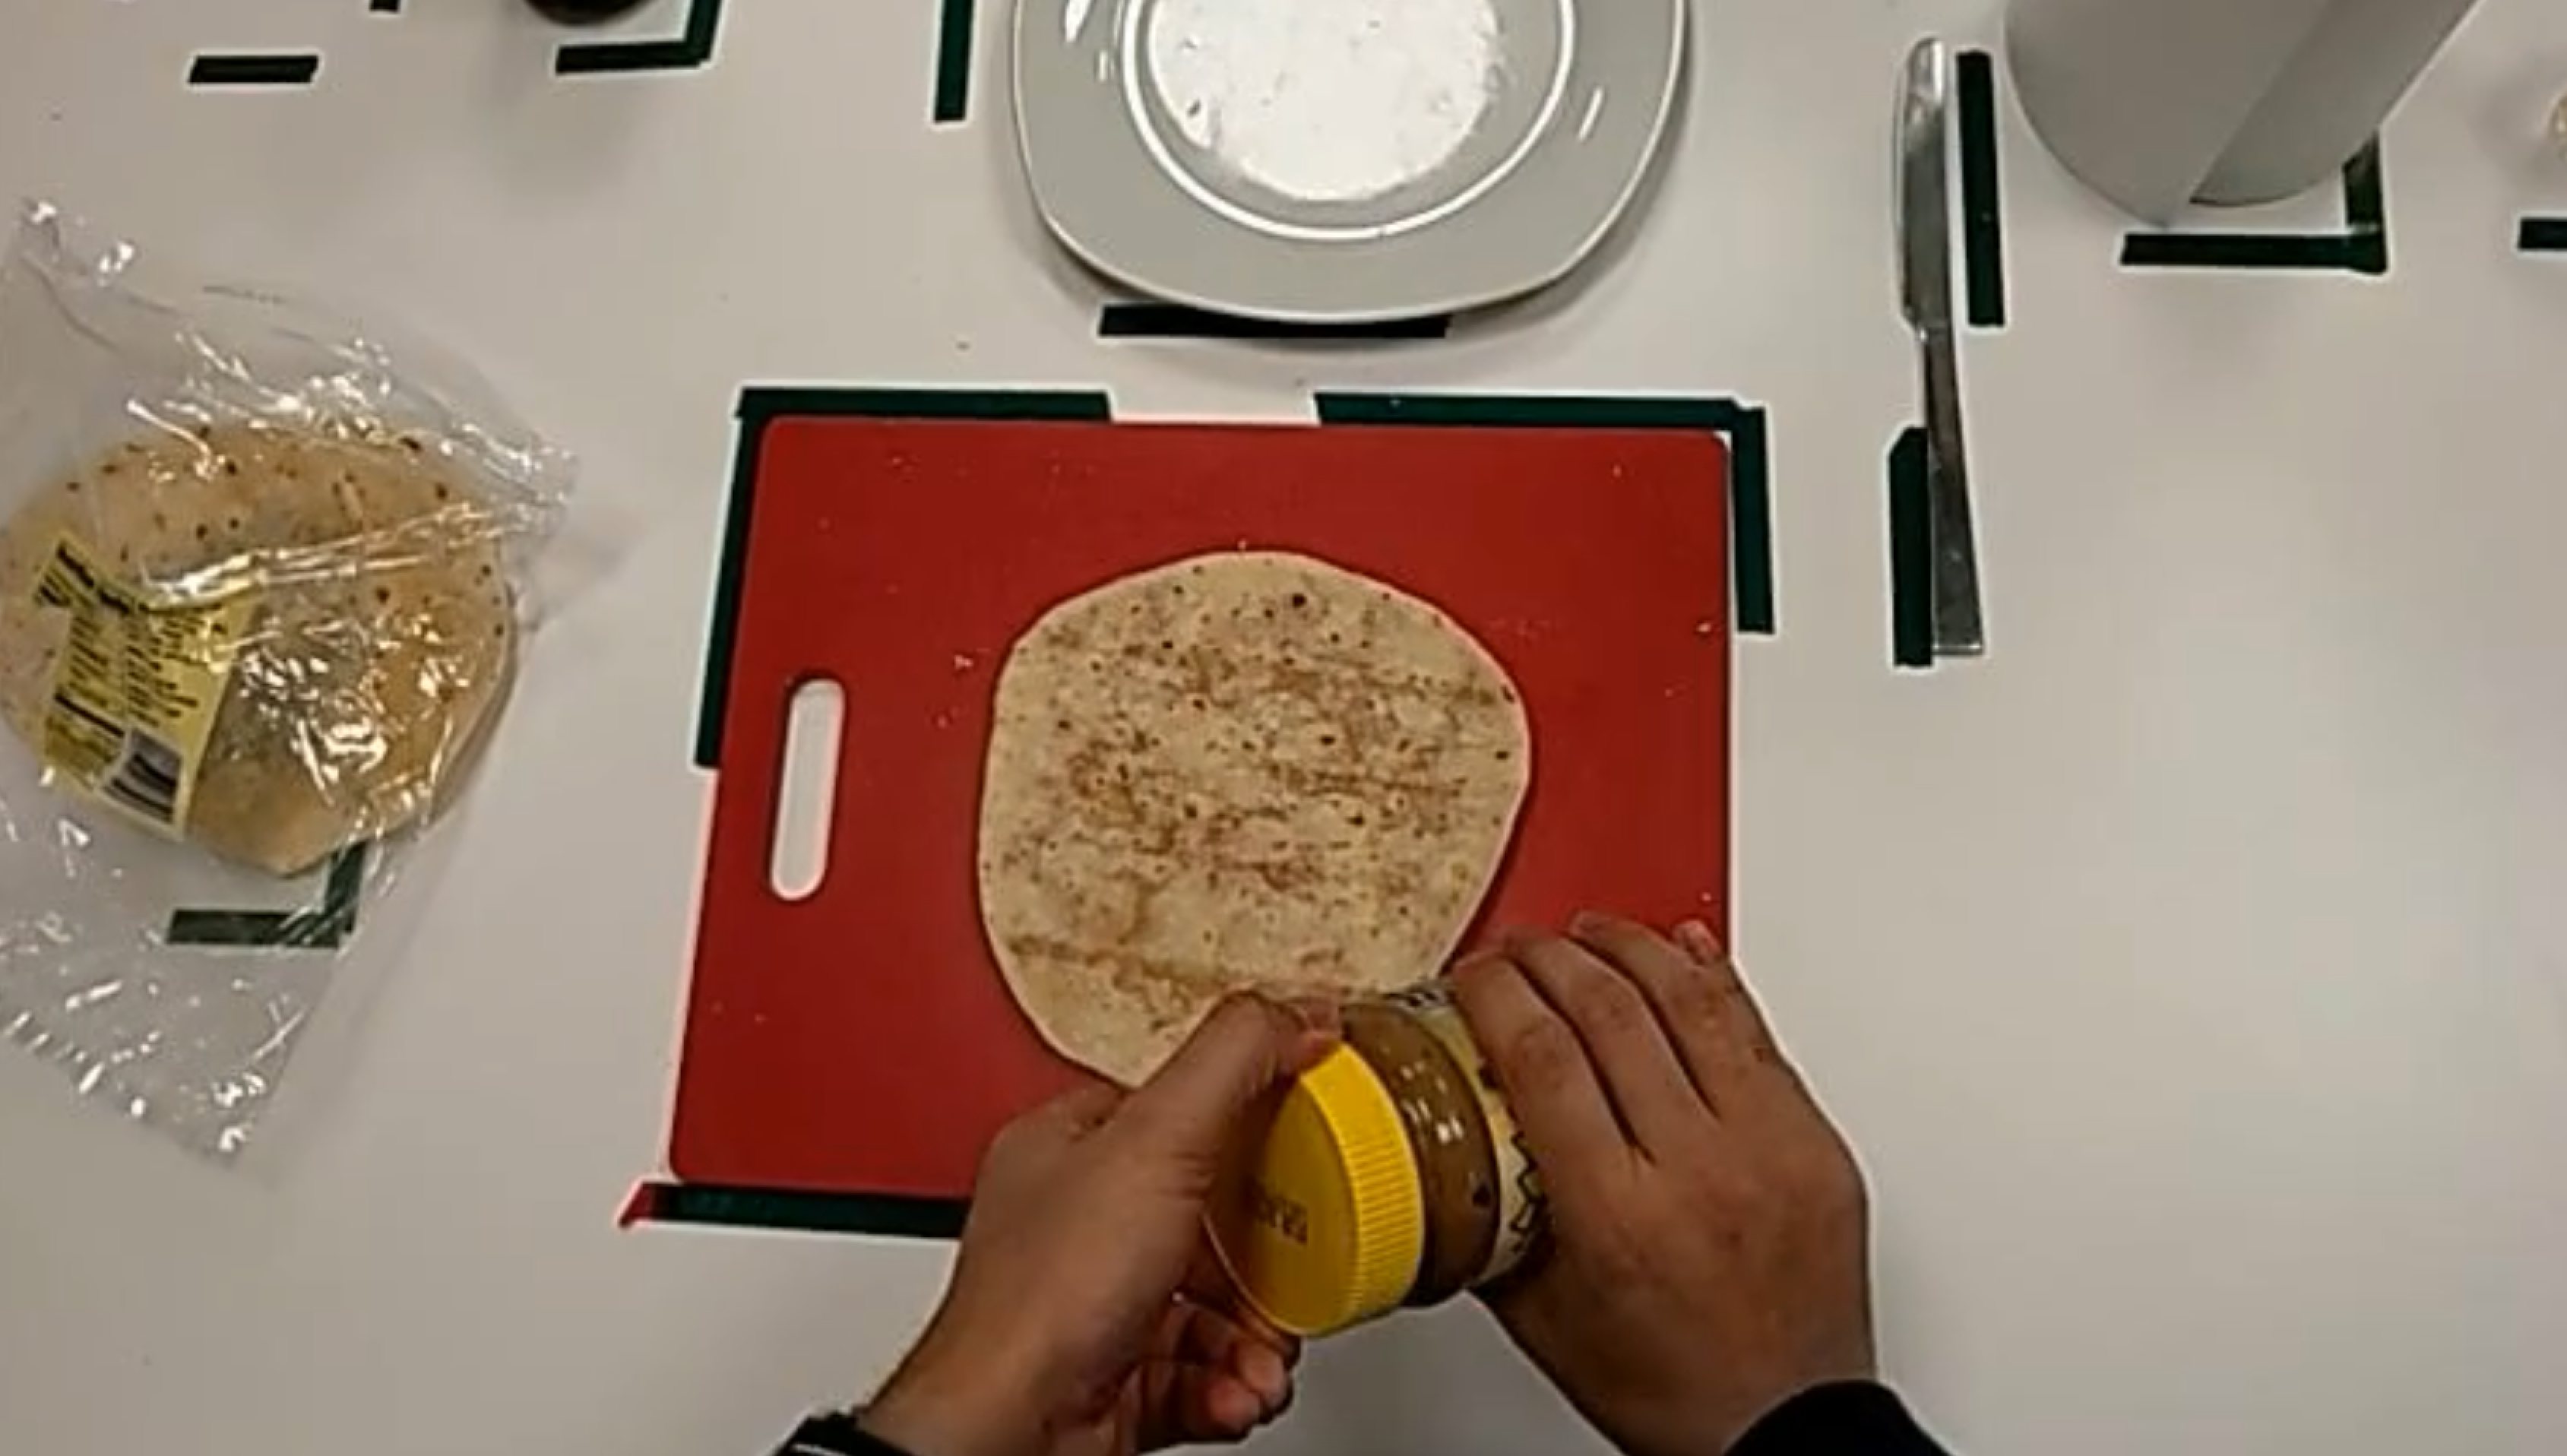

In [4]:
image = Image.open("./images/p1.png")
image

In [5]:
# Image captioning
inputs = processor(images=image, return_tensors="pt").to(device, torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

/ext3/miniconda3/envs/py38/lib/python3.8/site-packages/transformers/generation/utils.py:1369: UserWarning: Using `max_length`'s default (20) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a person is cutting a tortilla on a cutting board


In [6]:
prompt = "Question: where is the tortilla? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

it's on the cutting board


In [9]:
prompt = "Question: How many tortillas are there? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

There are two tortillas


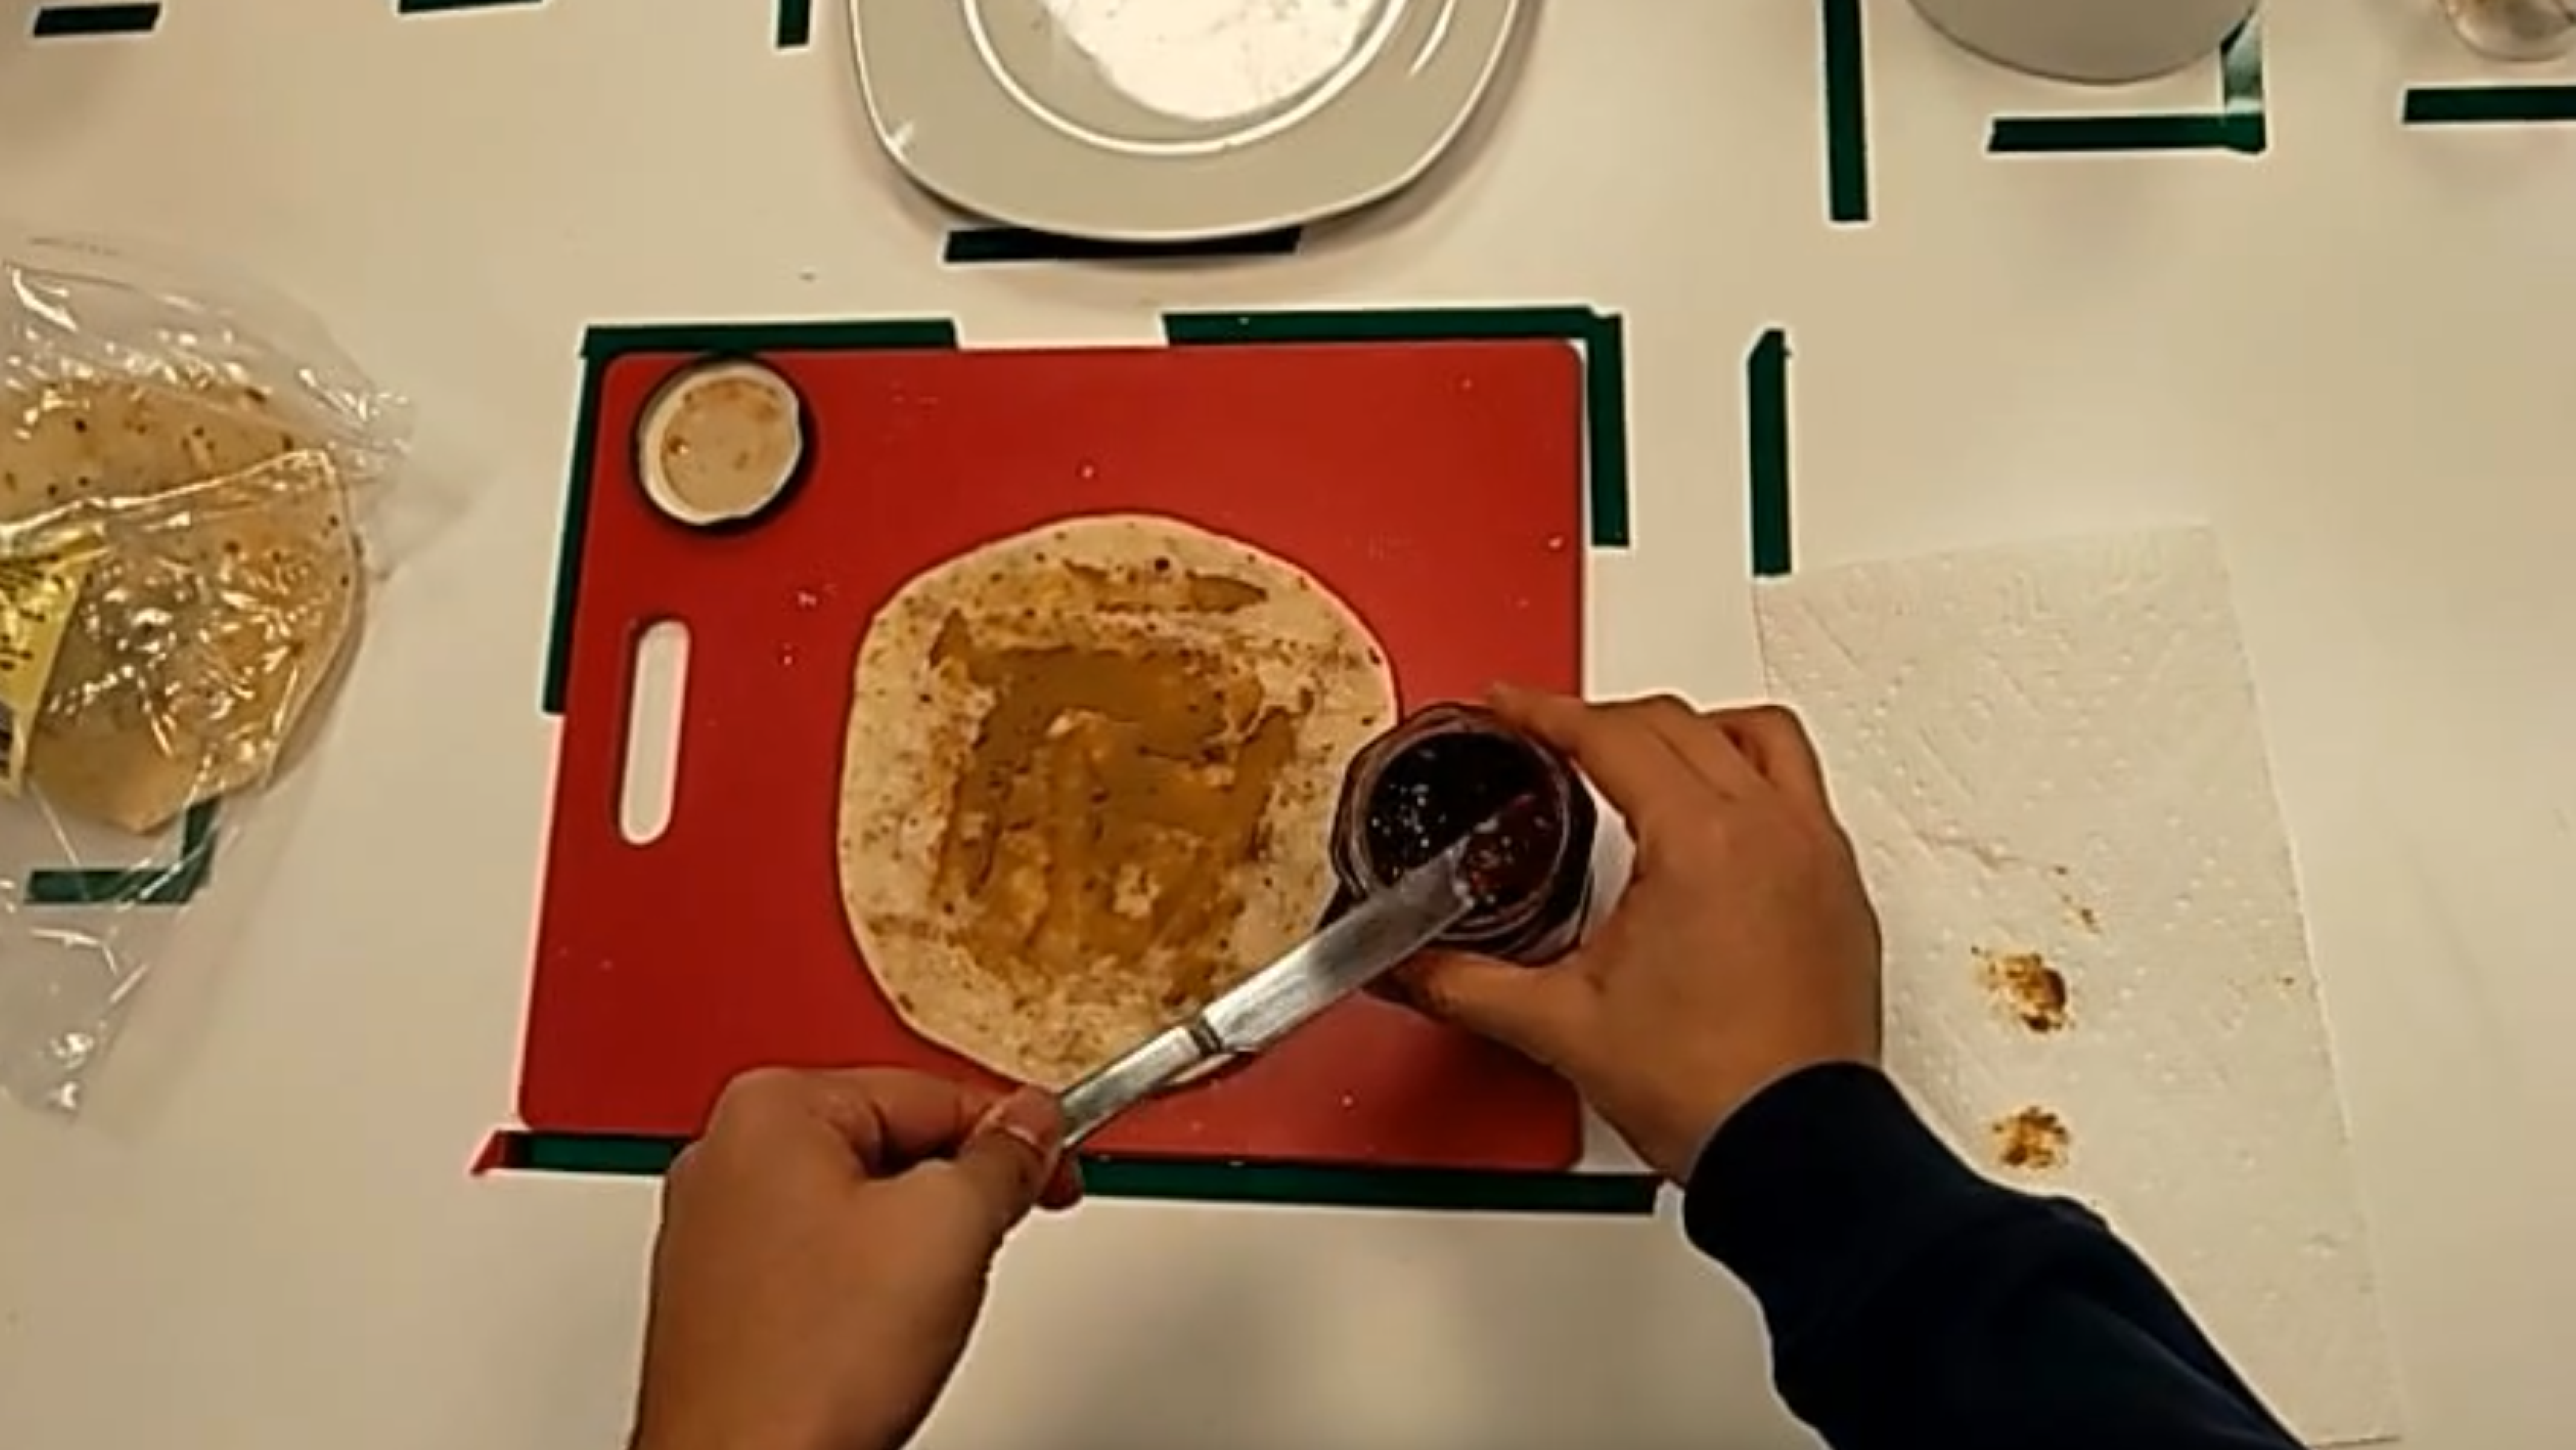

In [9]:
image = Image.open("./images/p2.png")
image

In [12]:
prompt = "Question: what the user is doing? Answer:"
inputs = processor(images=image, text=prompt, return_tensors="pt").to(device="cuda", dtype=torch.float16)

generated_ids = model.generate(**inputs)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

making a tortilla


In [ ]:
'''from transformers import Blip2ForConditionalGeneration, AutoProcessor

model = Blip2ForConditionalGeneration.from_pretrained("./data/blip2/blip2-opt-2.7b").to(device)
processor = AutoProcessor.from_pretrained("./data/blip2/blip2-opt-2.7b")
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
image = Image.open(requests.get(url, stream=True).raw)
inputs = processor(images=image, return_tensors="pt").to(device)
pixel_values = inputs.pixel_values

generated_ids = model.generate(pixel_values=pixel_values, max_length=50)
generated_caption = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
generated_caption'''